In [96]:
import random
from typing import TypedDict, Literal

from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

ORDER_ID="ORD155"
INITIAL_NODE_ORDER="order"
DEALER_NODE_1="d_a"
DEALER_NODE_2="d_b"

In [100]:
class OrderInfo(TypedDict):
    order_id: str
    dealer_id: str
    dealer_location: str


def order_request(order: OrderInfo):
    print(f"Order Initiated - {order}")
    return {"order_id": order["order_id"]}


def dealer_a(order: OrderInfo):
    print(f"Shipping order:{order["order_id"]} via Dealer A")
    return {"dealer_id": "Dealer A", "dealer_location": "Chennai"}


def dealer_b(order: OrderInfo):
    print(f"Shipping order:{order["order_id"]} via Dealer B")
    return {"dealer_id": "Dealer B", "dealer_location": "Puducherry"}


def decide_dealer(order: OrderInfo) -> Literal[DEALER_NODE_1, DEALER_NODE_2]:
    print(f"Checking with Delivery Dealers availability for {order['order_id']}")
    rnd_value = random.random()
    if rnd_value > 0.5:
        return DEALER_NODE_1
    else:
        return DEALER_NODE_2

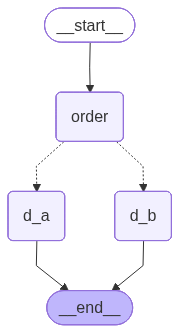

Order Initiated - {'order_id': 'ORD155'}
Checking with Delivery Dealers availability for ORD155
Shipping order:ORD155 via Dealer A
{'order_id': 'ORD155', 'dealer_id': 'Dealer A', 'dealer_location': 'Chennai'}


In [102]:
state_graph = StateGraph(OrderInfo)
state_graph.add_node(INITIAL_NODE_ORDER, order_request)
state_graph.add_node(DEALER_NODE_1, dealer_a)
state_graph.add_node(DEALER_NODE_2, dealer_b)

state_graph.add_edge(START, INITIAL_NODE_ORDER)
state_graph.add_conditional_edges(INITIAL_NODE_ORDER, decide_dealer)
state_graph.add_edge(DEALER_NODE_1, END)
state_graph.add_edge(DEALER_NODE_2, END)

graph = state_graph.compile()

display(Image(graph.get_graph().draw_mermaid_png()))
order_info: OrderInfo = graph.invoke({"order_id": ORDER_ID})
print(order_info)
